## Clustering IMR90 cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 29th, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [1]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("./truePositives/imr90LR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/IMR90forML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
str(one) # let's examine the structure of data

'data.frame':	945458 obs. of  15 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0.0285 ...
 $ H3K36me3  : num  0 0 0 0 0.0367 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 15)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 3330.0 Gb


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

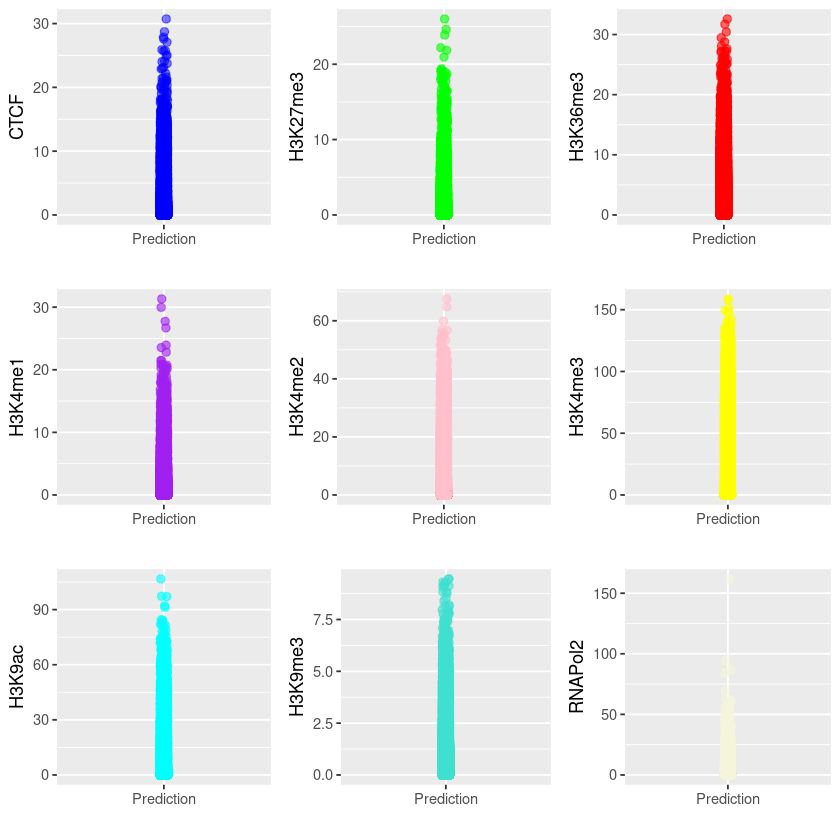

In [5]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9)

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [6]:
summary(one)

      chr             start                end               Class.x      
 chr1   : 91598   Min.   :        1   Min.   :     2000   Hub    : 43097  
 chr2   : 86696   1st Qu.: 36174501   1st Qu.: 36176500   Non-Hub:902361  
 chr4   : 68418   Median : 77830001   Median : 77832000                   
 chr3   : 65915   Mean   : 87772128   Mean   : 87774127                   
 chr5   : 57511   3rd Qu.:133626001   3rd Qu.:133628000                   
 chr6   : 54798   Max.   :249250370   Max.   :249250621                   
 (Other):520522                                                           
   Prediction          CTCF            H3K27me3           H3K36me3       
 Hub    : 43097   Min.   : 0.0000   Min.   : 0.00000   Min.   : 0.00000  
 Non-Hub:902361   1st Qu.: 0.2151   1st Qu.: 0.00000   1st Qu.: 0.00000  
                  Median : 0.4609   Median : 0.08536   Median : 0.07341  
                  Mean   : 0.4760   Mean   : 0.23183   Mean   : 0.59501  
                  3rd Qu.: 0.6

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [8]:
kmeans3 <- kmeans(one[, - c(1:5, 15)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 75.32715 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering.

In [9]:
kmeans2 <- kmeans(one[, - c(1:5, 15)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 70.24517 %

Now the percentage has gone down to ~ 70 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

In [10]:
if(!require(devtools)) install.packages("devtools",
                                       dependencies = TRUE,
                                       repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
suppressPackageStartupMessages(library(devtools))

if(!require(FeatureImpCluster)) install_github("o1iv3r/FeatureImpCluster")
suppressPackageStartupMessages(library(FeatureImpCluster))

Loading required package: devtools

Loading required package: usethis

Loading required package: FeatureImpCluster

Loading required package: data.table


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




Loading required package: flexclust

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



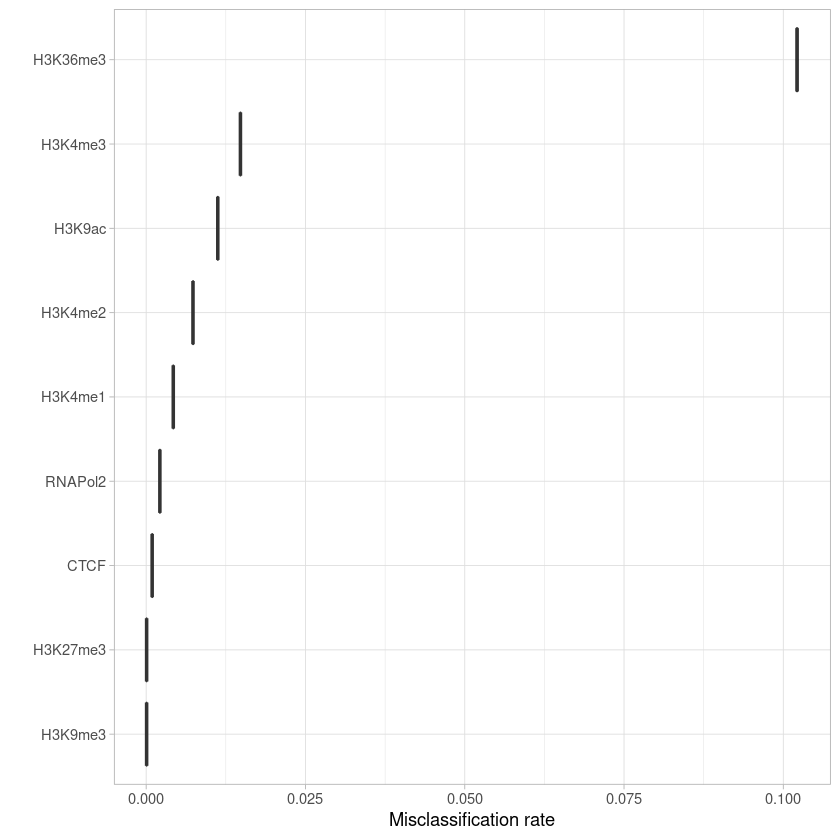

In [11]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(flexclust))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 15)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 15)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [12]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 15)]), varName = "H3K36me3")

[1] 0.1021484 0.1018607 0.1023536 0.1022372 0.1020913

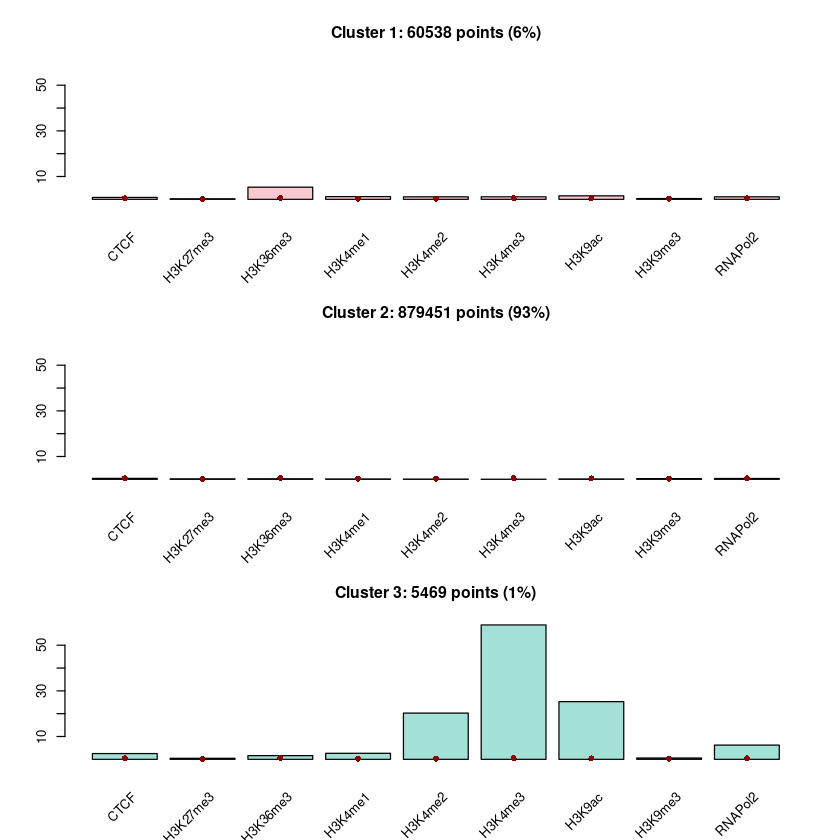

In [13]:
barplot(res)

<p align= "justify"> In Cluster 1, we notice that H3K36me3 is enriched that is known to mark active genes. In Cluster 3, however, H3K4me2, H3K4me3, H3K9ac, and RNAPol2 are distinctly enriched and all of them could be accounted for transcription activation. Again, in cognizance to the low number of "Hubs" in the data, Cluster 3 might be a manifestation of the same, in addition to housing highly expressed markers for transcription. </p>

### Verifying with the true positives from Random Forests

In [14]:
classDataRF <- read.table("./truePositives/imr90RF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [15]:
str(two)

'data.frame':	1395122 obs. of  15 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0.0285 ...
 $ H3K36me3  : num  0 0 0 0 0.0367 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [16]:
kmeans3_1 <- kmeans(two[, - c(1:5, 15)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 67.55301 %

In [17]:
kmeans2_1 <- kmeans(two[, - c(1:5, 15)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 59.07906 %

In [23]:
kmeans4 <- kmeans(two[, - c(1:5, 15)], centers = 4, nstart = 20, iter.max = 40)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

The within cluster sum of squares for this clustering is 73.53524 %

In [22]:
kmeans5 <- kmeans(two[, - c(1:5, 15)], centers = 5, nstart = 20, iter.max = 40)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 69756100)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 69756100)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 69756100)”


The within cluster sum of squares for this clustering is 76.39206 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [24]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 15)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 15)]))

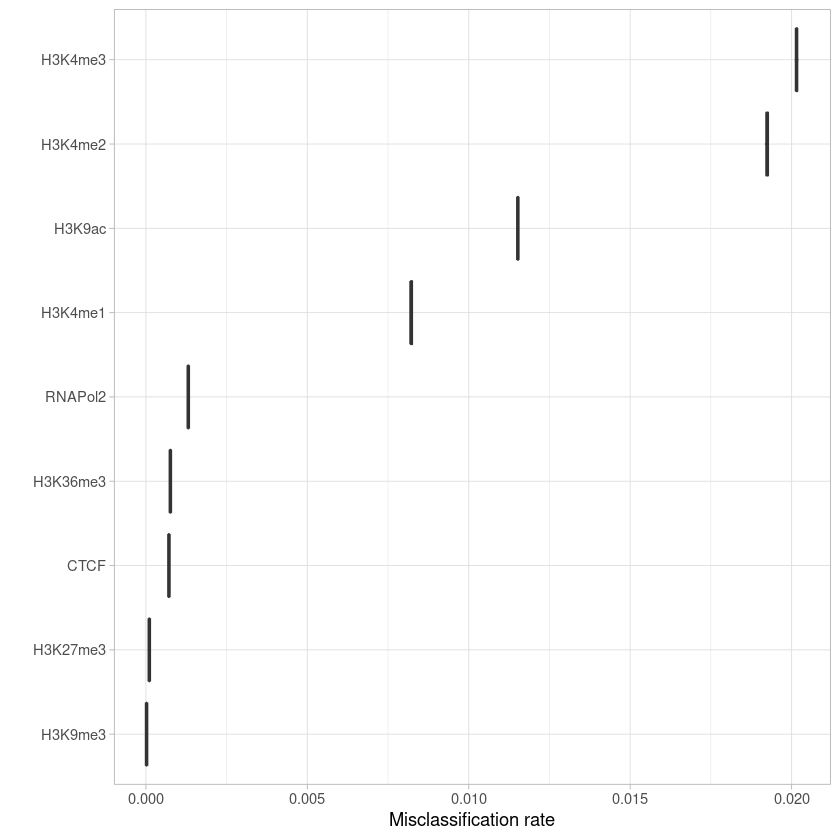

In [25]:
plot(resultFeatureImp1)

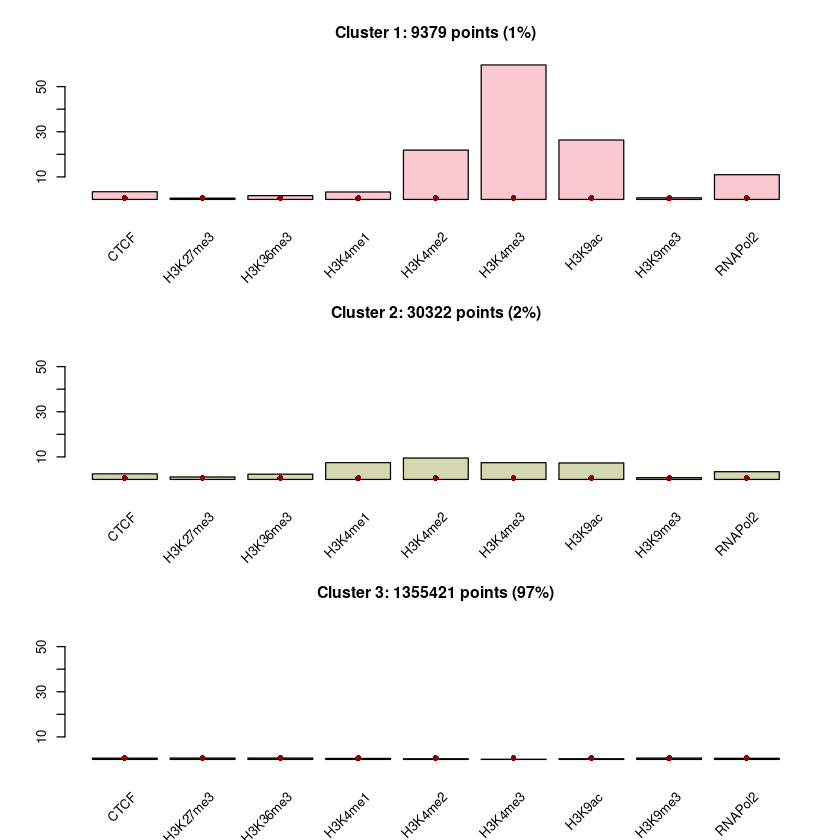

In [26]:
barplot(res1)

<p align = "justify"> The above bar plots also reciprocate the same essence as the data from the logistic regression models. Clusters 1 and 2 likely reflect the theme of transcriptional activity. </p>

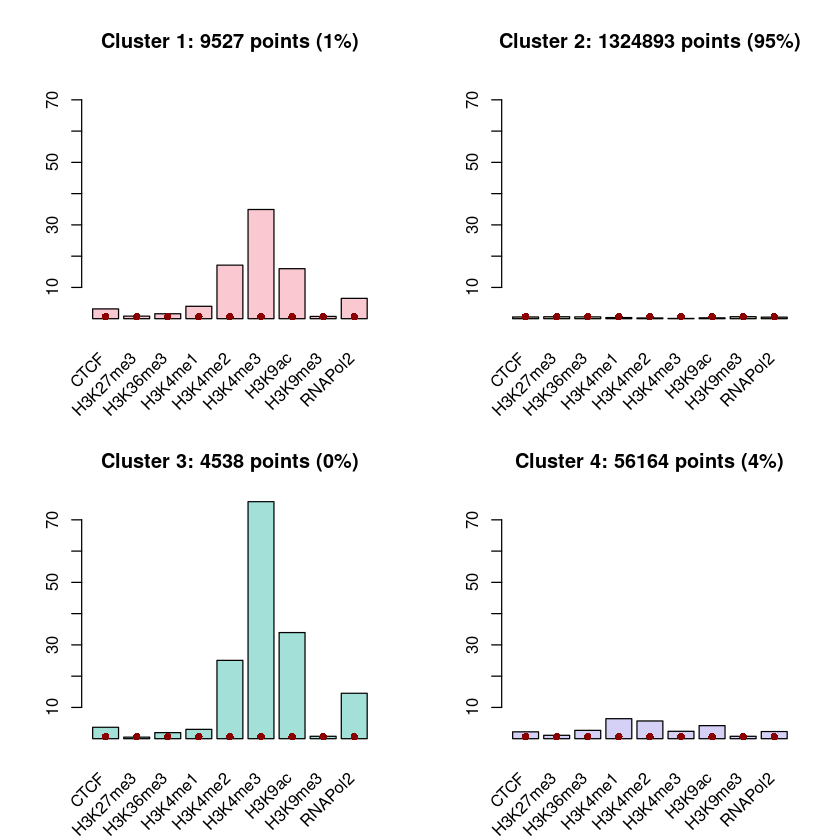

In [27]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 15)], k = 4)
barplot(res2)

Clusters 1, 3 and 4 shows signs of transcriptional activation and might be considered aligned with "Hubs".

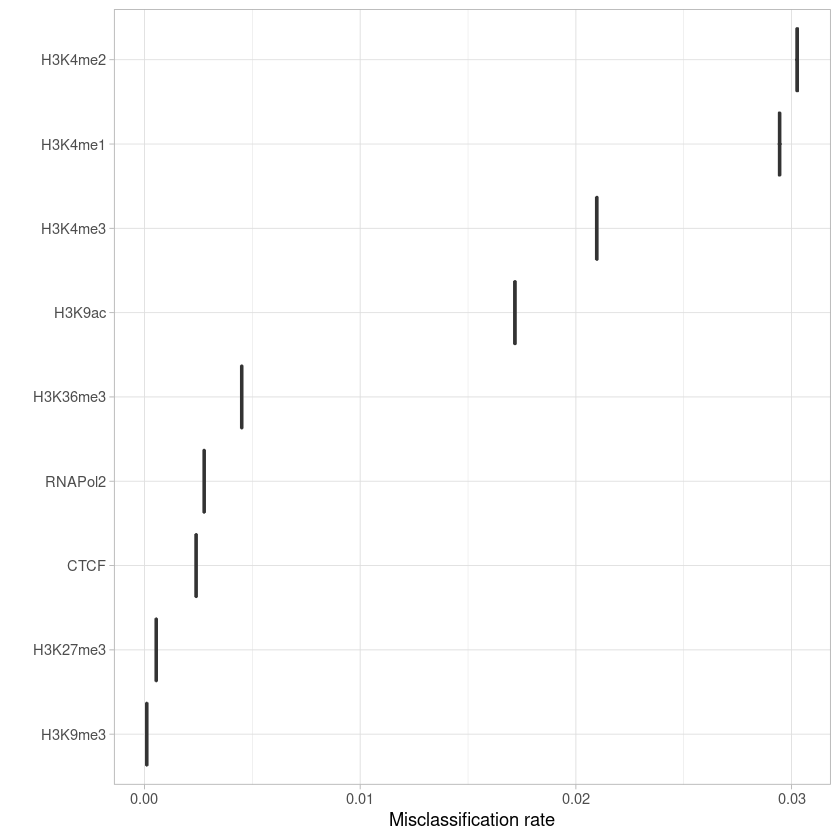

In [28]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 15)]))
plot(resultFeatureImp2)

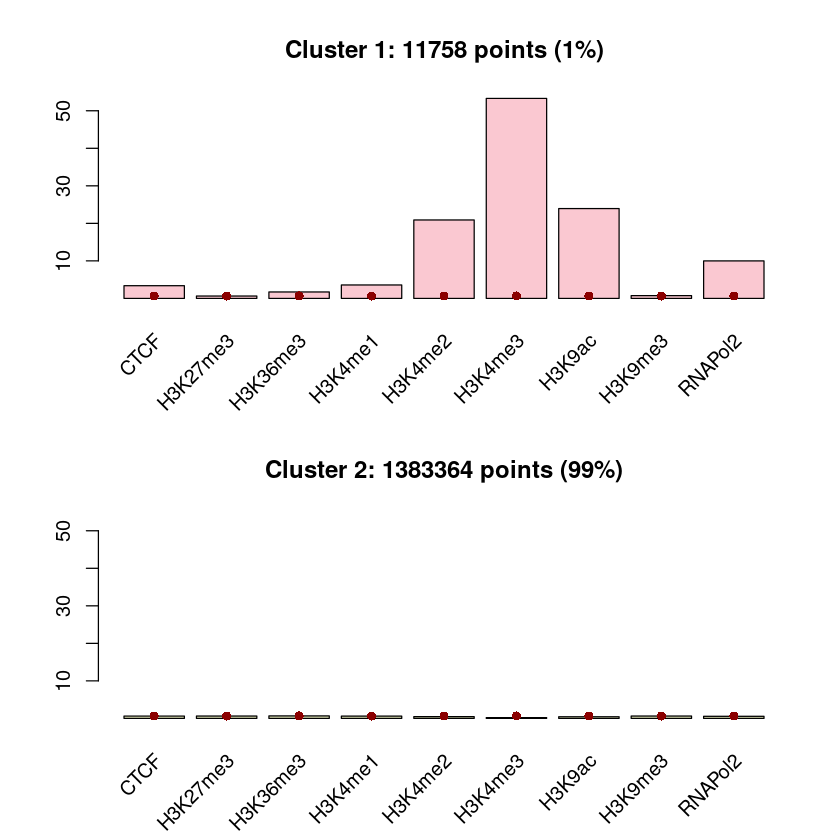

In [29]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 15)], k = 2)
barplot(res3)

This is a clearer differentiation than the rest of the attempts. Cluster 1 has all elements enriched that correspond to transcriptional activation; again, the cardinality corroborates the point. 

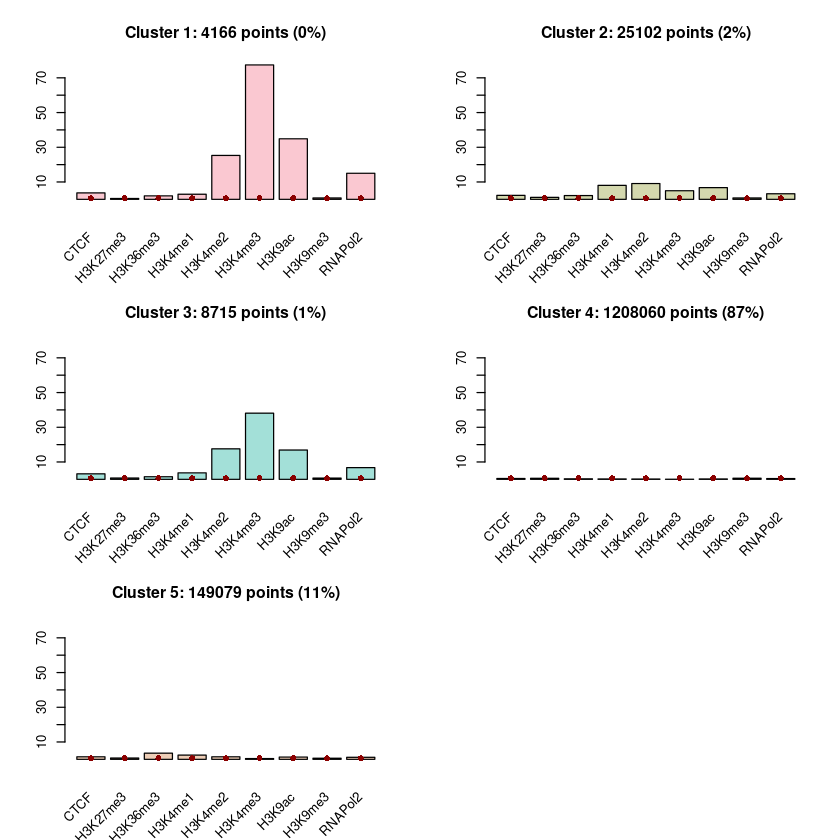

In [30]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 15)], k = 5)
barplot(res4)

We observe that when the data is clustered into 5 units, the trend still persists. Cluster 4, that incubates maximum data has immensely slight bump of H3K9me3, that is a prominent mark of repressed chromatin regions. The residual clusters, representing lesser data points, shows signs of transcription activation; all "positive" marks could be observed to be differentially expressed there. 

### Conclusion

<p align = "justify"> No concreteness could be associated with the results from the machine learning models. </p> 

In [31]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] flexclust_1.4-0         modeltools_0.2-23       lattice_0.20-41        
 [4] FeatureImpCluster_0.1.2 data.table_1.13.4       devtools_2.3.2         
 [7] usethis_1.6.3           gridExtra_2.3           forcats_0.5.0          
[10] stringr_1.4.0           purrr_0.3.4             readr_1.3.1            
[13